## Scan folder (and subfolders) and detect all possible Aruco markers 
For each image run Aruco detection for all possible aruco dictionaries and store the ids and location of the markers. Anotate all images with the detected markers
### Main Function
arucos,ims,counts=main(input_folder,output_folder)
- arucos : dictionary ["image file name": ["detected aruco dict":(coords, ids)]
- ims : list of image files pathname
- count: dictionary ["aruco dict":(number of markers detected, number of images with detections)]

In [2]:
import cv2
import os
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def detect_aruco_markers(image, aruco_dicts,counts):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    detected_markers = {}
    
    for dict_name, aruco_dict in aruco_dicts.items():
        aruco_params = cv2.aruco.DetectorParameters_create()
        corners, ids, rejected = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)
        
        if ids is not None:
            detected_markers[dict_name] = (corners, ids.flatten().tolist())
            counts[dict_name]+=len(ids.flatten().tolist())
    
    return detected_markers

def scan_folder_for_images(input_folder):
    image_files = []
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_files.append(os.path.join(root, file))
    return image_files

def draw_markers(image, detected_markers):
    for dict_name, (corners, ids) in detected_markers.items():
        if ids is not None:
            cv2.aruco.drawDetectedMarkers(image, corners, np.array(ids))
            for i, corner in enumerate(corners):
                corner = corner[0]
                top_left = tuple(corner[0].astype(int))
                bottom_right = tuple(corner[2].astype(int))
                text = f'{dict_name}: {ids[i]}'
                cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    return image

def main(input_folder, output_folder):
    aruco_dicts = {
        'DICT_4X4_50': cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_50),
        'DICT_4X4_100': cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_100),
        'DICT_4X4_250': cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250),
        'DICT_4X4_1000': cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_1000),
        'DICT_5X5_50': cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50),
        'DICT_5X5_100': cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_100),
        'DICT_5X5_250': cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_250),
        'DICT_5X5_1000': cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_1000),
        'DICT_6X6_50': cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_50),
        'DICT_6X6_100': cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_100),
        'DICT_6X6_250': cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250),
        'DICT_6X6_1000': cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_1000),
        'DICT_7X7_50': cv2.aruco.Dictionary_get(cv2.aruco.DICT_7X7_50),
        'DICT_7X7_100': cv2.aruco.Dictionary_get(cv2.aruco.DICT_7X7_100),
        'DICT_7X7_250': cv2.aruco.Dictionary_get(cv2.aruco.DICT_7X7_250),
        'DICT_7X7_1000': cv2.aruco.Dictionary_get(cv2.aruco.DICT_7X7_1000),
        'DICT_ARUCO_ORIGINAL': cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL),
        'DICT_APRILTAG_16h5': cv2.aruco.Dictionary_get(cv2.aruco.DICT_APRILTAG_16h5),
        'DICT_APRILTAG_25h9': cv2.aruco.Dictionary_get(cv2.aruco.DICT_APRILTAG_25h9),
        'DICT_APRILTAG_36h10': cv2.aruco.Dictionary_get(cv2.aruco.DICT_APRILTAG_36h10),
        'DICT_APRILTAG_36h11': cv2.aruco.Dictionary_get(cv2.aruco.DICT_APRILTAG_36h11),
    }

    image_files = scan_folder_for_images(input_folder)

    results = {}
    counts =dict.fromkeys(aruco_dicts,(0,0))

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_file in image_files:
        # print(f"Processing {image_file}")
        image = cv2.imread(image_file)
        detected_markers = detect_aruco_markers(image, aruco_dicts,counts)
        results[image_file] = detected_markers
        
        annotated_image = draw_markers(image, detected_markers)
       
        output_path = os.path.join(output_folder, os.path.relpath(image_file, input_folder))
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        cv2.imwrite(output_path, annotated_image)
    
    return results, image_files,counts

In [16]:
input_folder = '/home/vican/Dataset_Vican/cangalho/camera-images-cangalho/'
output_folder = './output_folder'
arucos,ims,counts=main(input_folder,output_folder)

In [18]:
input_folder = '/home/vican/Dataset_Vican/ipad/aruco_ipad/'
output_folder = './output_folder_ipad'
arucos2,ims2,count2=main(input_folder,output_folder)

## Uma vez testado, transformar em python script

To paralelize use https://ipyparallel.readthedocs.io/en/latest/

In [ ]:
if __name__ == "__main__":
    input_folder = '/home/vican/Dataset_Vican/cangalho/camera-images-cangalho/'
    output_folder = './output_folder'
    results = main(input_folder, output_folder)
    print(results)

## Confirmar detecção na primeira imagem (só um dicionario detectado)

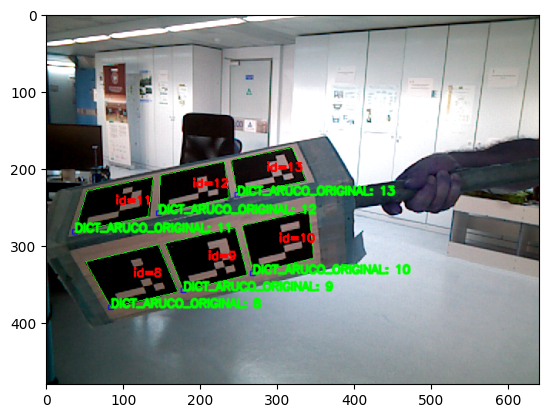

In [6]:
ims=list(arucos.keys())
im0=arucos[ims[0]]
img=cv2.imread(ims[0])
aimg=draw_markers(img,im0)
plt.imshow(aimg)
plt.show()

In [17]:
counts

{'DICT_4X4_50': 1,
 'DICT_4X4_100': 1,
 'DICT_4X4_250': 11,
 'DICT_4X4_1000': 13,
 'DICT_5X5_50': 0,
 'DICT_5X5_100': 0,
 'DICT_5X5_250': 0,
 'DICT_5X5_1000': 0,
 'DICT_6X6_50': 0,
 'DICT_6X6_100': 0,
 'DICT_6X6_250': 0,
 'DICT_6X6_1000': 0,
 'DICT_7X7_50': 0,
 'DICT_7X7_100': 0,
 'DICT_7X7_250': 0,
 'DICT_7X7_1000': 0,
 'DICT_ARUCO_ORIGINAL': 462,
 'DICT_APRILTAG_16h5': 0,
 'DICT_APRILTAG_25h9': 0,
 'DICT_APRILTAG_36h10': 0,
 'DICT_APRILTAG_36h11': 0}